In [1]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import os
from workalendar.europe import Germany
from datetime import date, timedelta
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
import pvlib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import torch
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv('combined_data.csv', parse_dates=True, index_col='timestamp')


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Log-transformed Target')
plt.title('Log-transformed Time Series Data')
plt.xlabel('Time')
plt.ylabel('Log-transformed Target')
plt.legend()
plt.show()

In [4]:
df['value'] = np.log1p(df['value'])

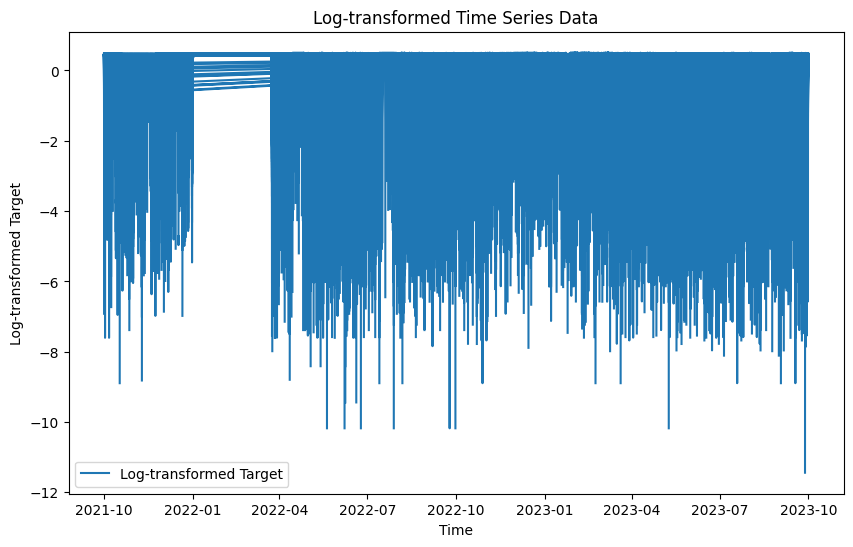

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Log-transformed Target')
plt.title('Log-transformed Time Series Data')
plt.xlabel('Time')
plt.ylabel('Log-transformed Target')
plt.legend()
plt.show()

In [8]:
df['value'] = df['value'].diff()


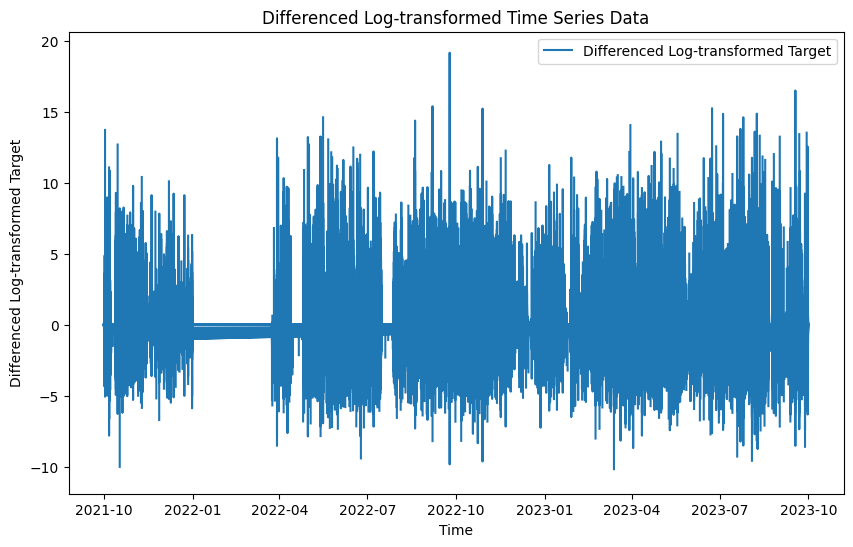

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Differenced Log-transformed Target')
plt.title('Differenced Log-transformed Time Series Data')
plt.xlabel('Time')
plt.ylabel('Differenced Log-transformed Target')
plt.legend()
plt.show()

In [13]:
df = df.dropna()
nan_values = df.isnull().sum()
print(nan_values)

Unnamed: 0            0
t_2mc                 0
aswdifd_s             0
aswdir_s              0
vmax_10m              0
tot_prec              0
value                 0
seasonal_trend        0
seasonal_seasonal     0
seasonal_residuals    0
solar_zenith          0
solar_azimuth         0
Day_value_Stamp       0
day_of_week           0
Holidays              0
dtype: int64


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df['log_target'], model='additive', period=12)

deseasonalized_series = df['log_target'] - result.seasonal

plt.figure(figsize=(12, 6))
plt.plot(df['log_target'], label='Original')
plt.plot(deseasonalized_series, label='Deseasonalized', linestyle='--')
plt.title('Original and Deseasonalized Time Series')
plt.xlabel('Time')
plt.ylabel('Log-transformed Target')
plt.legend()
plt.show()
